# T021 · One-Hot Encoding

Developed in the CADD seminar 2020, Volkamer Lab, Charité/FU Berlin 

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:

- Sakshi Misra, CADD seminar 2020, Charité/FU Berlin
- Talia B. Kimber, 2020, [Volkamer lab](https://volkamerlab.org), Charité
- Yonghui Chen, 2020, [Volkamer lab](https://volkamerlab.org), Charité
- Andrea Volkamer, 2020, [Volkamer lab](https://volkamerlab.org), Charité

## Aim of this talktorial

The aim of the talktorial is to perform one-hot encoding of SMILES structures on a subset of the ChEMBL data set to gain a deeper understanding on the one-hot encoding concept and why it is useful as a pre-processing step in various machine learning algorithms.

### Contents in *Theory*

- Molecular data and representation
    - ChEMBL database
    - SMILES structures and rules
- What is categorical data?
     - What is the problem with categorical data?
     - How to convert categorical data to numerical data?
- The One-Hot Encoding (OHE) concept
     - Why using one-hot encoding?
     - Example of one-hot encoding
     - Advantages and disadvantages of one-hot encoding
- Similar: Integer or label encoding
- What is *padding*?
- Further readings

### Contents in *Practical*

- Import necessary packages
- Read the input data
- Process the data
     - Double digit replacement
     - Compute longest (& shortest) SMILES
- Python one-hot encoding implementation
     - One-hot encode (padding=True)
     - Visualization
          - Shortest SMILES
          - Longest SMILES 
- Supplementary material
   - Scikit learn implementation
   - Keras implementation

## References

- Theoretical background:
     - ChEMBL database: "The ChEMBL bioactivity database: an update." ([<i>Nucleic acids research<i> (2014), <b>42.D1</b>, D1083-D1090](https://doi.org/10.1093/nar/gkt1031))
     - Allen Chieng Hoon Choong, Nung Kion Lee, "*Evaluation of Convolutionary Neural Networks Modeling of DNA Sequences using Ordinal versus one-hot Encoding Method*", [bioRxiv, October 25, 2017](https://doi.org/10.1101/186965).
     - Patricio Cerda, Gael Varoquaux, "*Encoding high-cardinality string categorical variables*", [arXiv:1907, 18 May 2020](https://arxiv.org/pdf/1907.01860v5.pdf).
     - Blogpost: Jason Brownlee, *How to One Hot Encode Sequence Data in Python*, [Machine Learning Mastery, accessed November 9th, 2020](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/).
     - Blogpost: Krishna Kumar Mahto, *One-Hot-Encoding, Multicollinearity and the Dummy Variable Trap*, towardsdatascience, Available from [one-hot-encoding-multicollinearity](https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a/), accessed July 8th, 2019.
     - Blogpost: Chris, *What is padding in a neural network?*, archieved from MachineCurve, [Padding](https://github.com/christianversloot/machine-learning-articles/blob/main/what-is-padding-in-a-neural-network.md)
     

- Packages and functions:
     - [**RDKit**](https://www.rdkit.org/docs/GettingStartedInPython.html): Greg Landrum,  *RDKit Documentation*, [PDF](https://buildmedia.readthedocs.org/media/pdf/rdkit/latest/rdkit.pdf), Release on 2019.09.1.
     - [**Scikit-learn**](https://scikit-learn.org/stable/): 
        - [Scikit-learn: Machine Learning in Python](https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html), Pedregosa *et al.*, JMLR 12, pp. 2825-2830, 2011.
        - Jiangang Hao, et al. "A Review of Scikit-learn Package in Python Programming Language." [*Journal of Education and Behavioral Statistics* **Volume: 44 issue: 3** (2019), page(s): 348-361](https://doi.org/10.3102/1076998619832248)
     - [**Keras**](https://keras.io/): Book chapter: "An Introduction to Deep Learning and Keras" in [*Learn Keras for Deep Neural Networks* (2019), **page(s):1-16**](https://doi.org/10.1007/978-1-4842-4240-7).
     - [**Matplotlib**](https://matplotlib.org/)
     - `smiles encoder` function: Blogpost by iwatobipen, *encode and decode SMILES strings* , [Wordpress, accessed November 9th, 2020](https://iwatobipen.wordpress.com/2017/01/22/encode-and-decode-smiles-strings/)

## Theory

### Molecular data and representation

#### ChEMBL database

- [ChEMBL](https://www.ebi.ac.uk/chembl/) is an open large-scale bioactivity database, containing molecules with drug-like properties. 
- The recent release (version 25) contains information extracted from  more than $72,000$ documents. In total, there are now more than $1.8$ million compounds and $15$ million bioactivity data points available.
- It is maintained by [European Bioinformatics Institute](https://en.wikipedia.org/wiki/European_Bioinformatics_Institute). Please refer to __Talktorial T001__ for more details.

#### SMILES structures and rules

- [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) (Simplified Molecular Input Line Entry System) notation is a chemical notation that allows a user to represent a chemical structure of a molecule in a linear way that can be read by the computer (see "Modern Aspects of the Smiles Rearrangement" (2017), [*Chemistry A European Journal*, **Volume23, Issue38**, 8992-9008](https://doi.org/10.1002/chem.201700353) for further information).
- It contains a sequence of letters, numbers and characters that specify a molecule's atoms, their connectivity, bond order and chirality.

**Some SMILES specification rules**

- **Atoms** - are represented by their atomic symbols. Also metal atoms are represented with symbols in square bracket, e.g. Gold `[Au]`.
- **Bonds** - single, double and triple bonds are represented by symbols `-`, `=` and `#`, respectively. Single bonds are the default and therefore do not need to be specified. 
- **Aromaticity** - While atomic symbols are generally used in upper case, such as `C`, `O`, `S` and `N`; to specify aromatic atoms lower case symbols are used instead, such as `c`, `o`, `s` and `n`. Sometimes implicit bonds in rings (alternating `=` and `-`) are also used to describe aromatic atoms such as `C1=CC=CC=C1`.
- **Rings** - SMILES allows a user to identify ring structures by using numbers to identify the opening and closing ring atom. For example, in `C1CCCCC1`, the first carbon has a number "1" which connects by a single bond with the last carbon which also has a number "1". The resulting structure is cyclohexane.
- **Branches** - are specified by enclosing them in parentheses, and can be nested or arranged. For example, 2-Propanol is represented by `CC(O)C`.

### What is categorical data?

Categorical data are variables that contain labels rather than numeric values.
Some examples include:

- A "pet” variable with the values: "dog” and "cat".
- A "color” variable with the values: "red", "green” and "blue".
- A "place” variable with the values: "first”, "second” and "third".

#### What is the problem with categorical data?

Machine learning consists of mathematical operations translated to a computer via low-level programming languages. Computers are brilliant when dealing with numbers. So we must somehow convert our input data to numbers. 
There are many machine learning algorithms which cannot operate on categorical data directly. Thus, categorical data must be converted to a numerical form, that all input and output variables are numeric (see [**Blogpost**](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/): Alakh Sethi, *One-Hot Encoding vs. Label Encoding using Scikit-Learn* , Analytics Vidya, accessed March 6th, 2020 for further information).

![Computer data](./images/computer_data.jpeg)

*Figure 1*: Displays the categorical encoding required for computers to understand the input. The figure comes from this [blogpost](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/).

#### How to convert categorical data to numerical data?

There are many ways to convert categorical values into numerical values. Each approach has its own positive and negative impact on the feature set. Hereby, two main methods will be the focus: *One-hot* encoding and *Label* encoding.
Both of these encoders are part of the [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) library (one of the most widely used Python libraries) and are used to convert text or categorical data into numerical data which the model expects and and can work with.

### The *One-Hot Encoding* (OHE) concept

The one-hot encoding is a vector representation where all the elements of the vector are set to `0` except one, which has `1` as its value. For example, `[0 0 0 1 0 0]` is a one-hot vector.
Simply put, one-hot encoding, also known as binary encoding, is a binary representation of categorical variables as binary vectors. 

The figure shown below helps us gain an overall idea of the one-hot encoding concept. 

![One Hot encoding](./images/OneHotEncoding.png)

*Figure 2* : Displays the one-hot encoding of the toluene molecule. Figure taken from the article [<i>BMC Bioinformatics.</i> (2018), <b>19</b>,526](https://doi.org/10.1186/s12859-018-2523-5), more information can be found there.
 

Let us take a deeper look into the concept with the help of a simple example that will describe the basic concept of one-hot encoding, why it is useful and how one can approach it.

#### Why using one-hot encoding?

One-hot encoding allows the representation of categorical data to be more expressive.
It is difficult for many machine learning algorithms to work with categorical data directly that's why the label values which are categorical must be converted into numbers first as a preprocessing step. This is required for both input and output variables that are categorical.

We could also use an *integer encoding* directly. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature "cold", "warm", and "hot".
There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship by using integer encoding might be not useful to solve the problem. An example might be the labels "dog" and "cat".

#### Example of one-hot encoding

Let us take a look at a very simple example to understand this concept. Assume we have the "color" variable which has three labels `red` , `blue` and `green`.
All these labels must be converted into numeric form in order to work with our machine learning algorithm. This can be done by creating three new columns having all three labels and use `1` for the color of the respective label and `0` for the other colors as shown in Figure 4.

![One Hot Encoding](images/OneHotEncoding_eg.png)

*Figure 3* : The visual demonstration of one-hot encoding done on the variable "color". Figure taken from the article: "*Building a One Hot Encoding Layer with TensorFlow*", George Novack, [towardsdatascience](https://towardsdatascience.com/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39), more details can be found there.

####  Advantages and disadvantages of one-hot encoding 

**Advantages**
-  If the cardinality (the number of categories) of the categorical features is low (relative to the amount of data), one-hot encoding will work best.
-  One-hot encoding has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space.

**Disadvantages**
-  Increase in dimensionality, after adding several columns based on categorical variables which may result in an increase in the computational cost.
- There is a high chance of multi-collinearity due to dummy variables (unique category added as a feature) which can affect the performance of the model.
-  One-hot encoding can result in increasing the [sparsity](https://en.wikipedia.org/wiki/Sparse_matrix) of a data set (a sparse matrix is a matrix in which most of the elements are zero).

### Similar: Integer or label encoding

[Label Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html), or integer encoding, is a popular encoding technique for handling categorical variables and is easily reversible. In this technique, each label is assigned a unique integer based on alphabetical ordering, so that machines can work with it properly.
Machine learning algorithms can then decide in a better way on how labels must be operated on.
It is an important preprocessing step for structured data sets in supervised learning.

**Example of integer encoding**

Let us use a similar example as above: We have a color variable and we can assign `red` as `0`, `green` as `1`, and `blue` as `2` as shown in Figure 5.

![OneHotEncoding Example](./images/label_encoding_example.png)

*Figure 5* : The visual demonstration of label encoding done on the variable "color". Figure taken from the article: "*Know about Categorical Encoding, even New Ones!*", Ahmed Othmen, [towardsdatascience](https://towardsdatascience.com/know-about-categorical-encoding-even-new-ones-c266227b9cbd), more details can be found there.


**Difference between label and one-hot encoding**

There is not much difference between these two encoding techniques, it mainly depends on the type of data and model used. For example, if we have categorical features which are not ordinal (dog or cat) then we can use one-hot encoding. Label encoding works best with ordinal data like `good=0, better=1, best=2`.
Also when there are many categorical variables then it might be good to choose label encoding just to avoid high memory consumption and sparsity.

### What is *padding*? 

Padding is used to add zeros to the resulted one-hot encoded matrix. There are different types of padding, we chose to performed zero padding in here. For more details, please refer to this [Article](https://github.com/christianversloot/machine-learning-articles/blob/main/what-is-padding-in-a-neural-network.md).

**Why is it performed?**

Padding is performed to make the dimensions of the matrix equal - or to preserve the height and the width - and to not have to worry too much about tensor dimensions when used as an input for the deep learning models.


**How is it performed?**

Padding can be performed by using the [numpy.pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html) function which takes several parameters like the `array` which needs to be padded, `pad_width` which is number of values added to the edges of each axis and `mode` which by default is "constant".

In this talktorial, *padding* is performed

- *implicitly*: when applying one-hot encoding using a python implementation on the preprocessed data, where we have given the maximum length of the string as the parameter so that all the resulting one-hot encoded matrices are of the same dimension
- *explicitly*: More info on this can be found in the **supplementary section**, where we apply one-hot encoding using *keras* and *scikit-learn* implementations.

### Further readings

This section lists some resources for further reading:

- [What is one-hot encoding and when is it used in data science?](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science)
- [Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd#:~:text=One%2DHot%20Encoding%20in%20Python&text=OneHotEncoder%20from%20SciKit%20library%20only,apply%20OneHotEncoder%20on%20column%20Bridge_Types_Cat.)
- Hirohara, M., Saito, Y., Koda, Y. et al. Convolutional neural network based on SMILES representation of compounds for detecting chemical motif. [_BMC Bioinformatics_ **19**, 526 (2018)](https://doi.org/10.1186/s12859-018-2523-5)
- [How one can use matplotlib.pyplot.imshow() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/)

## Practical

### Import necessary packages

In [2]:
from pathlib import Path
from warnings import filterwarnings

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# Silence some expected warnings
filterwarnings("ignore")

In [3]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Read the input data

Using the Pandas library, we first load the subset of the ChEMBL data set and draw the molecules using the `rdkit.draw` function. We then preprocess the data and apply our `one-hot encoding` python implementation.

Let's load the data and quickly analyze its column values and check if there are any missing values:

In [4]:
df = pd.read_csv(DATA / "CHEMBL25_activities_EGFR.csv", index_col=0).reset_index(drop=True)
print(f"Shape of dataframe: {df.shape}\n")
# NBVAL_CHECK_OUTPUT

Shape of dataframe: (3905, 5)


Check the dimension and missing value of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3905 non-null   object 
 1   IC50              3905 non-null   float64
 2   units             3905 non-null   object 
 3   canonical_smiles  3905 non-null   object 
 4   pIC50             3905 non-null   float64
dtypes: float64(2), object(3)
memory usage: 152.7+ KB


Look at the first 3 rows

In [6]:
df.head(3)
# NBVAL_CHECK_OUTPUT

,chembl_id,IC50,units,canonical_smiles,pIC50
0,CHEMBL207869,77.0,nM,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,CHEMBL3940060,330.0,nM,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,CHEMBL3678951,1.0,nM,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000


Select the columns which are necessary for our study

In [7]:
df = df[["chembl_id", "canonical_smiles"]]

We can visualize the molecules with their ChEMBL ID using pandas tools and the `draw` method as shown below.

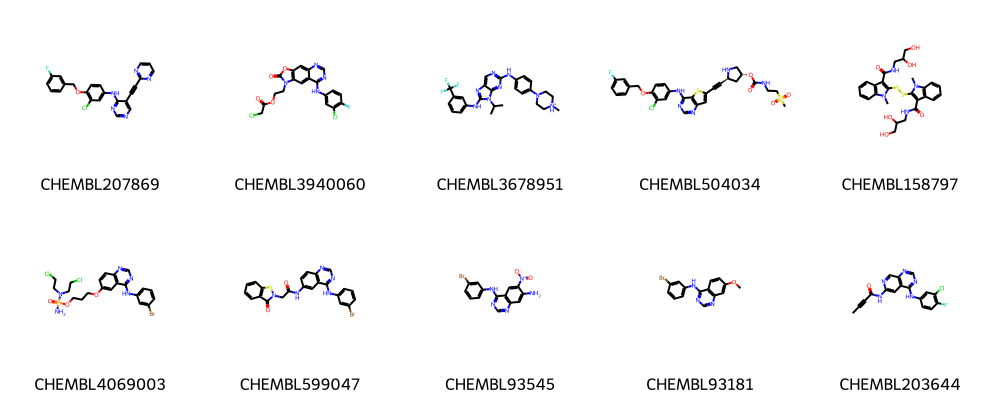

In [8]:
# Using PandasTools and the respective Draw method
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="canonical_smiles", molCol="Mol2D")
Draw.MolsToGridImage(list(df.Mol2D[0:10]), legends=list(df.chembl_id[0:20]), molsPerRow=5)

### Process the data

SMILES preprocessing: Since in SMILES representation, atoms can be described by one or two characters (depending on the periodic element they represent) while the machine will read the input position-wise, we convert the SMILES in a chemical-aware representation.

- First, we search for all unique characters present in the current data set, which allows us to remove the characters which are not present in the current data.

- Second, we search for all double-character elements in our SMILES data set by comparing the atoms present in our strings with all the possible elements present in the periodic table and replacing all the two alphabetic elements by *artificially* selected characters, for example changing `Cl` to `L`.

For padding:

- SMILES strings have unequal dimension since their string length differ. For machine learning application, having equal dimension throughout the data set is required. In order to achieve this, we can first search for the SMILES string with the maximum length (e.g. [len()](https://www.geeksforgeeks.org/python-string-length-len/) method) and pass it as an argument in our function for all the strings.

#### Double digit replacement

In [9]:
def assess_two_letter_elements(df):
    """
    Find the two letter elements in dataframe.

    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe which requires preprocessing.

    Returns
    -------
    two_letter_elements : list
        List with found two letter elements
    """

    # Search for unique characters in SMILES strings
    unique_chars = set(df.canonical_smiles.apply(list).sum())
    # Get upper and lower case letters only
    upper_chars = []
    lower_chars = []
    for entry in unique_chars:
        if entry.isalpha():
            if entry.isupper():
                upper_chars.append(entry)
            elif entry.islower():
                lower_chars.append(entry)
    print(f"Upper letter characters {sorted(upper_chars)}")
    print(f"Lower letter characters {sorted(lower_chars)}")

    # List of all possible periodic elements
    periodic_elements = [
        "Ac",
        "Al",
        "Am",
        "Sb",
        "Ar",
        "As",
        "At",
        "Ba",
        "Bk",
        "Be",
        "Bi",
        "Bh",
        "B",
        "Br",
        "Cd",
        "Ca",
        "Cf",
        "C",
        "Ce",
        "Cs",
        "Cl",
        "Cr",
        "Co",
        "Cn",
        "Cu",
        "Cm",
        "Ds",
        "Db",
        "Dy",
        "Es",
        "Er",
        "Eu",
        "Fm",
        "Fl",
        "F",
        "Fr",
        "Gd",
        "Ga",
        "Ge",
        "Au",
        "Hf",
        "Hs",
        "He",
        "Ho",
        "H",
        "In",
        "I",
        "Ir",
        "Fe",
        "Kr",
        "La",
        "Lr",
        "Pb",
        "Li",
        "Lv",
        "Lu",
        "Mg",
        "Mn",
        "Mt",
        "Md",
        "Hg",
        "Mo",
        "Mc",
        "Nd",
        "Ne",
        "Np",
        "Ni",
        "Nh",
        "Nb",
        "N",
        "No",
        "Og",
        "Os",
        "O",
        "Pd",
        "P",
        "Pt",
        "Pu",
        "Po",
        "K",
        "Pr",
        "Pm",
        "Pa",
        "Ra",
        "Rn",
        "Re",
        "Rh",
        "Rg",
        "Rb",
        "Ru",
        "Rf",
        "Sm",
        "Sc",
        "Sg",
        "Se",
        "Si",
        "Ag",
        "Na",
        "Sr",
        "S",
        "Ta",
        "Tc",
        "Te",
        "Ts",
        "Tb",
        "Tl",
        "Th",
        "Tm",
        "Sn",
        "Ti",
        "W",
        "U",
        "V",
        "Xe",
        "Yb",
        "Y",
        "Zn",
        "Zr",
    ]

    # The two_char_elements list contains all two letter elements
    # which can be generated by all possible combination of upper x lower characters
    # and are valid periodic elements.
    two_char_elements = []
    for upper in upper_chars:
        for lower in lower_chars:
            ch = upper + lower
            if ch in periodic_elements:
                two_char_elements.append(ch)

    # This list is then reduced to the subset of two-letter elements
    # that actually appear in the SMILES strings, specific to our data set.
    two_char_elements_smiles = set()
    for char in two_char_elements:
        if df.canonical_smiles.str.contains(char).any():
            two_char_elements_smiles.add(char)

    return two_char_elements_smiles

In [10]:
elements_found = assess_two_letter_elements(df)
print(f"\nTwo letter elements found in the data set: {sorted(elements_found)}")
# NBVAL_CHECK_OUTPUT

Upper letter characters ['B', 'C', 'F', 'H', 'I', 'N', 'O', 'P', 'S']
Lower letter characters ['c', 'e', 'l', 'n', 'o', 'r', 's']

Two letter elements found in the data set: ['Br', 'Cl', 'Cn', 'Sc', 'Se']


Based on this finding, we defined our own dictionary for replacement. Note that their are several shortcomings with this *simple* implementation that we (partially) manually address here:

- We exclude `Sc` and `Cn` from the replacement, since it is more likely that sulfur `S` and an aromatic carbon `c` are contained in a molecule than scandium `Sc`, same for carbon `C` and an aromatic nitrogen `n` over Copernicium `Cn`. Thus, only the elements chlorine `Cl`, bromine `Br` and selenium `Se` are replaced. 
- In isomeric SMILES `@` and `@@` are used to describe enantiomers, thus we also need to replace the latter by a one letter code.
- If you are working wit a different data set, you may want to adapt the below mapping dictionary.

This resulted in the following dictionary to replace the two letter elements found in this data set

In [11]:
replace_dict = {"Cl": "L", "Br": "R", "Se": "X", "@@": "Z"}

Based on this dictionary, we define a function to create the preprocessed data.

In [12]:
def preprocessing_data(df, replacement):
    """
    Preprocess the SMILES structures in a data set.

    Parameters
    ----------
    df : pandas.DataFrame
      Dataframe which requires preprocessing.
    replacement : dict
      Dictionary with mapping for replacement.

    Returns
    -------
    df : pandas.DataFrame
        Dataframe with new processed canonical SMILES column.
    unique_char : list
        List with unique characters present in SMILES.
    """
    # Print warning if the data set has a 'Sc' element
    if df.canonical_smiles.str.contains("Sc").any():
        print(
            'Warning: "Sc" element is found in the data set, since the element is rarely found '
            "in the drugs so we are not converting  "
            'it to single letter element, instead considering "S" '
            'and "c" as separate elements. '
        )

    # Create a new column having processed canonical SMILES
    df["processed_canonical_smiles"] = df["canonical_smiles"].copy()

    # Replace the two letter elements found with one character
    for pattern, repl in replacement.items():
        df["processed_canonical_smiles"] = df["processed_canonical_smiles"].str.replace(
            pattern, repl
        )

    unique_char = set(df.processed_canonical_smiles.apply(list).sum())
    return df, unique_char

In [13]:
# Calling function
df, unique_char = preprocessing_data(df, replace_dict)
df.head(3)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...
2,CHEMBL3678951,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...


In [14]:
# Print unique characters
print(f"All unique characters found in the preprocessed data set:\n{sorted(unique_char)}")
# NBVAL_CHECK_OUTPUT

All unique characters found in the preprocessed data set:
['#', '(', ')', '+', '-', '/', '0', '1', '2', '3', '4', '5', '6', '7', '=', '@', 'B', 'C', 'F', 'H', 'I', 'L', 'N', 'O', 'P', 'R', 'S', 'X', 'Z', '[', '\\', ']', 'c', 'n', 'o', 's']


#### Compute longest (& shortest) SMILES

Here, we compute the length and the indices in the data frame of the longest and shortest SMILES, which we will use later in the sections for visualization purpose.

In [15]:
# Index of the longest SMILES string
longest_smiles = max(df["canonical_smiles"], key=len)
longest_smiles_index = df.canonical_smiles[df.canonical_smiles == longest_smiles].index.tolist()
print(f"Longest SMILES: {longest_smiles}")
print(f"Contains {len(longest_smiles)} characters, index in dataframe: {longest_smiles_index[0]}.")
smiles_maxlen = len(longest_smiles)
# NBVAL_CHECK_OUTPUT

Longest SMILES: O=C(N[C@@H]1C(=O)N[C@H](CCC[NH3+])C(=O)N[C@@H]([C@H](CC)C)C(=O)N[C@H](Cc2ccccc2)C(=O)N[C@@H](Cc2[nH]cnc2)C(=O)N[C@H](CC(=O)[O-])C(=O)N[C@@H](CC(=O)N)C(=O)NCCCC1)[C@@H](NC(=O)[C@H](NC(=O)[C@@H](NC(=O)[C@H]1N=C([C@@H]([NH3+])[C@H](CC)C)SC1)CC(C)C)CCC(=O)[O-])[C@H](CC)C
Contains 267 characters, index in dataframe: 2704.


In [16]:
# Index of the shortest SMILES string
shortest_smiles = min(df["canonical_smiles"], key=len)
shortest_smiles_index = df.canonical_smiles[df.canonical_smiles == shortest_smiles].index.tolist()
print(f"Shortest SMILES: {shortest_smiles}")
print(
    f"Contains {len(shortest_smiles)} characters, index in dataframe: {shortest_smiles_index[0]}."
)
# NBVAL_CHECK_OUTPUT

Shortest SMILES: Oc1c(O)cccc1
Contains 12 characters, index in dataframe: 3428.


### Python one-hot encoding implementation

#### One-hot encode (padding=True)

We define a function `smiles_encoder` that takes SMILES, the maximum length of the SMILES string (`max_len`) for padding and the list of unique characters (`unique_char`) present in the `processed_canonical_smiles` column; and returns the one-hot encoded matrix of fixed shape.

In [17]:
# Function defined to create one-hot encoded matrix
def smiles_encoder(smiles, max_len, unique_char):
    """
    Function defined using all unique characters in our
    processed canonical SMILES structures created
    with the preprocessing_data function.

    Parameters
    ----------
    smiles : str
         SMILES of a molecule in string format.
    unique_char : list
         List of unique characters in the string data set.
    max_len : int
         Maximum length of the SMILES string.

    Returns
    -------
    smiles_matrix : numpy.ndarray
         One-hot encoded matrix of fixed shape
         (unique char in smiles, max SMILES length).
    """
    # create dictionary of the unique char data set
    smi2index = {char: index for index, char in enumerate(unique_char)}
    # one-hot encoding
    # zero padding to max_len
    smiles_matrix = np.zeros((len(unique_char), max_len))
    for index, char in enumerate(smiles):
        smiles_matrix[smi2index[char], index] = 1
    return smiles_matrix

In [18]:
# Apply the function to the processed canonical SMILES strings
df["unique_char_ohe_matrix"] = df["processed_canonical_smiles"].apply(
    smiles_encoder, max_len=smiles_maxlen, unique_char=unique_char
)
df.head(3)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles,unique_char_ohe_matrix
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,CHEMBL3678951,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


#### Visualization

Matplotlib is a plotting library for the python programming language and Pyplot is a state-based interface to a matplotlib module which provides a MATLAB-like interface.
The [imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) function in the pyplot module of the matplotlib library is used to display data as an image i.e. on a 2D space.

We now visualize our one-hot encoded matrix using `imshow` by defining the `one_hot_matrix_plot` function as shown below.

In [19]:
def one_hot_matrix_plot(ohe_matrix, smiles_char, smiles):
    """
    Visualize one-hot encoded matrix
    using matplotlib imshow() function.

    Parameters
    ----------
    ohe_matrix : numpy.ndarray
       One-hot encoded (ohe) matrix of shape
       (`smiles_char`, `len(smiles)`).
    smiles_char : list
        List of all possible SMILES characters.
    smiles : string
        Original SMILES string of respective molecule.

    Returns
    ------
    None

    """
    im = plt.imshow(ohe_matrix, cmap="hot", interpolation="None")
    plt.xlabel("Length of SMILES string")
    plt.ylabel(f"Char in SMILES ({len(smiles_char)})")
    plt.title("Visualization of one-hot encoded matrix")
    plt.show()
    print("Shape of one-hot matrix : ", ohe_matrix.shape)
    print("Associated canonical SMILES: ", smiles)
    return None

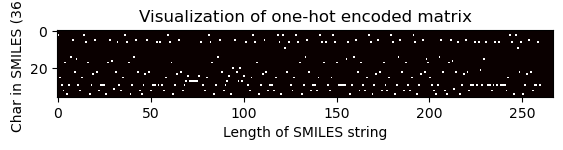

Shape of one-hot matrix :  (36, 267)
Associated canonical SMILES:  O=C(N[C@@H]1C(=O)N[C@H](CCC[NH3+])C(=O)N[C@@H]([C@H](CC)C)C(=O)N[C@H](Cc2ccccc2)C(=O)N[C@@H](Cc2[nH]cnc2)C(=O)N[C@H](CC(=O)[O-])C(=O)N[C@@H](CC(=O)N)C(=O)NCCCC1)[C@@H](NC(=O)[C@H](NC(=O)[C@@H](NC(=O)[C@H]1N=C([C@@H]([NH3+])[C@H](CC)C)SC1)CC(C)C)CCC(=O)[O-])[C@H](CC)C


In [20]:
# Pass the index of the longest SMILES string to visualize the matrix
one_hot_matrix_plot(
    df.iloc[longest_smiles_index[0]]["unique_char_ohe_matrix"], unique_char, longest_smiles
)

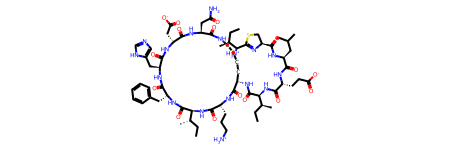

In [21]:
# Draw the molecules with the longest SMILES
longest_smiles_mol = Chem.MolFromSmiles(longest_smiles)
longest_smiles_mol

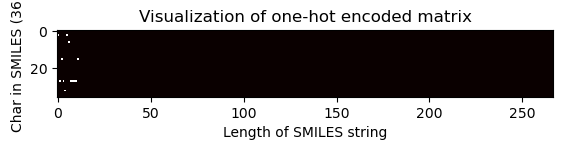

Shape of one-hot matrix :  (36, 267)
Associated canonical SMILES:  Oc1c(O)cccc1


In [22]:
# Pass the index of the shortest SMILES string to visualize the matrix
one_hot_matrix_plot(
    df.iloc[shortest_smiles_index[0]]["unique_char_ohe_matrix"], unique_char, shortest_smiles
)

From above, the matrix visualization was performed using matplotlib `imshow` function, we can also visualize the entire matrix using the `numpy.matrix` function, e.g. the one-hot encoded matrix of the longest SMILES string as shown below.

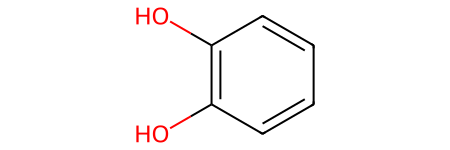

In [23]:
# Draw the molecules with the shortest SMILES
shortest_smiles_mol = Chem.MolFromSmiles(shortest_smiles)
shortest_smiles_mol

In [24]:
# Print the some rows of the matrix for the molecule with the longest smiles
np.set_printoptions(threshold=np.inf)
subset = 3
unique_char = list(unique_char)
print(
    f"First {subset} rows of the ohe matrix, representing the characters {unique_char[0:subset]}\n"
)
print(np.matrix(df.iloc[longest_smiles_index[0]]["unique_char_ohe_matrix"])[0:subset, :])

First 3 rows of the ohe matrix, representing the characters ['/', '0', 'O']

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 

## Discussion

In the fields of computer aided drug discovery and development, machine learning techniques have been used for the development of novel drug candidates. The methods for designing drug targets and novel drug discovery now oftenly combine machine learning and deep learning algorithms to enhance the efficiency, efficacy, and quality of developed outputs. 

But to work with any machine learning or deep learning algorithms, the input data should be in machine readable format. In computed-aided drug design, we mainly deal with the categorical or textual data where we work with drug molecules which are represented in SMILES string format, therefore we have to convert these categorical data to a numerical format. 

**One-hot encoding** is one of the popular and efficient encoding technique which converts the data to a numerical format. It can be used an important preprocessing steps before applying any machine learning or deep learning algorithms.

In this talktorial, we have applied one hot encoding after preprocessing the data to overcome some of the shortcomings such as:

- Make equal dimension of the one-hot encoded matrices because SMILES strings could have unequal dimension since their string length might differ and for most machine learning application having equal dimension throughout the data set is required.

- Replacing two character element such as `Cl` to a single character because while one-hot encoding, it would split `Cl` into two characters, namely `C` and `l`, and that could lead to discrepancies.  

- Looking for unique characters in the data set to produce less sparse one-hot encoded matrices.


One-hot encoding has several applications in various fields such as:

- __Machine learning (neural networks)__: In machine learning , one-hot encoding is a frequently used method to deal with categorical data because many machine learning models need their input variables to be numeric.

- __Natural language processing (NLP)__: For NLP, most of the times data consists of corpus of words which is categorical in nature. Consider we have vocabulary of size $N$. In the one-hot encoding technique, we map the words to the vectors of length $n$, where the $n$th digit is an indicator of the presence of the particular word. The $n$th bit of each vector indicates the presence of the $n$th word in the vocabulary. For example if we are converting words to the one-hot encoding format, then we will see vectors such as $[0000\dots 100], [0000\dots 010], [0000\dots 001]$, and so on. Using this technique normal sentences can be represented as vectors and numerical operations can be then performed on this vector form.

## Quiz

- Why is it required to have equal dimensions of the one-hot encoded matrix?
- Is there any other way to pre-process the data?
- How and which machine learning models can be applied on the above data set?

## Supplementary material 

If you are interested in other implementations of one-hot encoding, please keep reading this section. This includes:

* Exploring **scikit-learn** and **keras** implementations of one-hot encoding.
* Performing **padding** before and after one-hot encoding.

### Scikit-learn implementation of one-hot encoding

Before implementing one-hot encoding using scikit-learn, we have defined the functions named 

* `later_padding`, which adds horizontal and vertical padding to the given matrix,
* and `initial_padding` which adds zeros to the character list after they are label encoded.

Both using the `numpy.pad` function as discussed in the theory section.

These functions are later used as a boolean parameter (`islaterpadding` and `isinitialpadding`) in the scikit-learn and keras implementations to choose if later padding or initial padding is required.

In [25]:
# Function to add padding after one-hot encoding
def later_padding(ohe_matrix, smiles_maxlen, unique_char):
    """
    Add horizontal and vertical padding
    to the given matrix using numpy.pad() function.

    Parameters
    ----------
    ohe_matrix : ndarray
        Character array.
    smiles_max_len : int
        Maximum length of the SMILES string.
    unique_char : list
        List of unique characters in the string data set.

    Returns
    -------
    padded_matrix : numpy.ndarray
           Padded one-hot encoded matrix of
           shape (unique char in smiles, max smile_length).
    """

    padded_matrix = np.pad(
        ohe_matrix,
        ((0, smiles_maxlen - len(ohe_matrix)), (0, len(unique_char) - len(ohe_matrix[0]))),
        "constant",
    )
    return padded_matrix

In [26]:
# Function to add padding before one-hot encoding
# after label (integer) encoding
def initial_padding(smiles, max_len):
    """
    Add zeroes to the list of characters
    after integer encoding them

    Parameters
    ----------
    smiles : str
       SMILES string.
    max_len : int
       Maximum length of the SMILES string

    Returns
    -------
    canonical_char_padded : numpy.ndarray
      Canonical character array padded to max_len.
    """
    canonical_char = list(smiles)
    # Perform padding on the list of characters
    canonical_char_padded = np.pad(canonical_char, (0, max_len - len(canonical_char)), "constant")
    return canonical_char_padded

**One-hot encoding using scikit-learn**

Now, we proceed with our second implementation of one-hot encoding from scikit-learn. We can use the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) from the `sklearn` library. 

* The function takes only numerical categorical values, hence any value of type string should be [label_encoded](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) first before one-hot encoding.
* Thus, in the functions below first label (integer) encoded SMILES are produced, then the integer encoded SMILES are transformed to one-hot encoded matrices.
* By default, the OneHotEncoder class returns a more efficient sparse encoding, which we disabled by setting the `sparse=False` argument.

In [27]:
# Use Scikit-learn implementation of one-hot encoding
def sklearn_one_hot_encoded_matrix(
    smiles, islaterpadding, isinitialpadding, smiles_maxlen, unique_char
):
    """
    Label and one-hot encodes the SMILES
    using sklearn LabelEncoder and OneHotEncoder implementation.

    Parameters
    ----------
    smiles : str
        SMILES string of a compound.
    islaterpadding : bool
        Paramater is `True` if `later_padding` is required,
        `False` otherwise.
    isinitialpadding : bool
        Paramater is `True` if `initial_padding` is required,
        `False` otherwise.
    smile_maxlen : int
       Maximum length of the SMILES string
    unique_char : list
        List of unique characters in the string data set.

    Returns
    -------
    onehot_encoded : numpy.ndarray
        One-hot encoded matrix of shape
        (chars in individual SMILES, length of individual SMILES).
    """
    # Integer encoding
    canonical_char = list(smiles)
    label_encoder = LabelEncoder()
    # Fit_transform function is used to first fit the data and then transform it
    integer_encoded = label_encoder.fit_transform(canonical_char)

    # If initial padding, add zeros to vector (columns in matrix)
    if isinitialpadding:
        integer_encoded = initial_padding(integer_encoded, smiles_maxlen)

    # One-hot encoding
    onehot_encoder = OneHotEncoder(sparse=False)
    # Reshape the integer encoded data
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    # If later padding, add zeros to ohe matrix
    if islaterpadding:
        onehot_encoded = later_padding(onehot_encoded, smiles_maxlen, unique_char)

    onehot_encoded = onehot_encoded.transpose()

    # If initial padding, add zeros to rows
    if isinitialpadding:
        row_padding = np.zeros(shape=(len(unique_char) - len(onehot_encoded), smiles_maxlen))
        onehot_encoded = np.append(onehot_encoded, row_padding, axis=0)
    return onehot_encoded

#### Without padding (unequal dimension)

We can use the `sklearn_one_hot_encoded_matrix` function defined above to create the one-hot encoded matrix without padding. 
This will create matrices with unequal dimensions, because it will first label encode all the characters present in the SMILES strings (individually) and then one-hot encode them.

In [28]:
# Apply the function over the processed canonical SMILES strings
df["sklearn_ohe_matrix_no_padding"] = df["processed_canonical_smiles"].apply(
    sklearn_one_hot_encoded_matrix,
    islaterpadding=False,
    isinitialpadding=False,
    smiles_maxlen=smiles_maxlen,
    unique_char=unique_char,
)
df.head(2)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles,unique_char_ohe_matrix,sklearn_ohe_matrix_no_padding
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


**Visualization of one-hot encoded matrix (unequal dimension)**

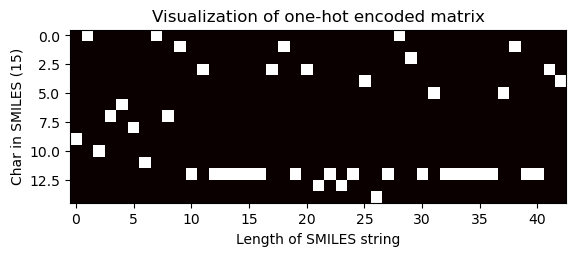

Shape of one-hot matrix :  (15, 43)
Associated canonical SMILES:  N([C@H](C)c1ccccc1)c1ncnc2oc(-c3ccccc3)cc12


In [29]:
# Choose index of the compound for which the OHE matrix is visualised
index = 100
one_hot_matrix_plot(
    df.iloc[index]["sklearn_ohe_matrix_no_padding"],
    df.iloc[index]["sklearn_ohe_matrix_no_padding"],
    df.iloc[index]["processed_canonical_smiles"],
)

#### With padding (equal dimension)
Padding can either be done before or after one-hot encoding is performed on the SMILES strings, meaning after we label encode the SMILES characters. 
We discuss both scenarios in the next sections.

##### Padding after one-hot encoding is performed

We simply pass **True** to the `islaterpadding` boolean parameter to the `sklearn_one_hot_encoded_matrix` function as shown below to pad the matrix after one-hot encoding is performed,

In [30]:
# Apply the function over the processed canonical SMILES strings
df["sklearn_ohe_matrix_later_padding"] = df["processed_canonical_smiles"].apply(
    sklearn_one_hot_encoded_matrix,
    islaterpadding=True,
    isinitialpadding=False,
    smiles_maxlen=smiles_maxlen,
    unique_char=unique_char,
)
df.head(2)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles,unique_char_ohe_matrix,sklearn_ohe_matrix_no_padding,sklearn_ohe_matrix_later_padding
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


**Visualization of one-hot encoded matrix (equal dimension)**

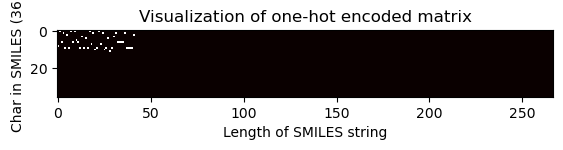

Shape of one-hot matrix :  (36, 267)
Associated canonical SMILES:  O(C)c1c(C(=Cc2c3c(N)nc(N)nc3oc2)CCCC)cccc1


In [31]:
# Choose index of the compound for which the OHE matrix is visualised
index = 2705
one_hot_matrix_plot(
    df.iloc[index]["sklearn_ohe_matrix_later_padding"],
    unique_char,
    df.iloc[index]["processed_canonical_smiles"],
)

##### Padding before one-hot encoding is performed

In this case, padding is performed before OHE - but after integer encoding - the list of SMILES characters by passing **True** to the `initial_padding` boolean parameter to the `sklearn_one_hot_encoded_matrix` function.

In [32]:
# Apply the function over the processed canonical SMILES strings
df["sklearn_ohe_matrix_initial_padding"] = df["processed_canonical_smiles"].apply(
    sklearn_one_hot_encoded_matrix,
    islaterpadding=False,
    isinitialpadding=True,
    smiles_maxlen=smiles_maxlen,
    unique_char=unique_char,
)

df.head(2)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles,unique_char_ohe_matrix,sklearn_ohe_matrix_no_padding,sklearn_ohe_matrix_later_padding,sklearn_ohe_matrix_initial_padding
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


**Visualization of one-hot encoded matrix (equal dimension)**

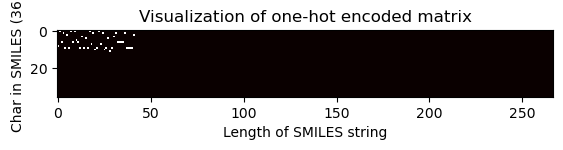

Shape of one-hot matrix :  (36, 267)
Associated canonical SMILES:  O(C)c1c(C(=Cc2c3c(N)nc(N)nc3oc2)CCCC)cccc1


In [33]:
# Choose index of the compound for which the OHE matrix is visualised
index = 2705
one_hot_matrix_plot(
    df.iloc[index]["sklearn_ohe_matrix_later_padding"],
    unique_char,
    df.iloc[index]["processed_canonical_smiles"],
)

### Keras implementation of one-hot encoding

Keras is also a very powerful and intensively used library, especially employed in deep learning tasks. 
There may be a case where we have sequences or strings that are already integer encoded, then we can use the function called [to_categorical()](https://keras.io/api/utils/), provided by the keras library, to one-hot encode integer data directly, otherwise we can use [Tokenizer](https://keras.io/api/preprocessing/text/) to first integer encode the string data and then use the `to_categorical` function to one-hot encode the data.

In [34]:
# Use keras implementation of one-hot encoding
def keras_one_hot_encoded_matrix(smiles, islaterpadding, smiles_maxlen, unique_char):
    """
    One-hot encodes the SMILES using keras
    implementation.

    Parameters
    ----------
    canonical_char : array
        Canonical character array.
    islaterpadding : bool
        The paramater is `True` if later_padding is required,
        `False` otherwise.
    smiles_maxlen : int
        Maximum length of the SMILES string.
    unique_char : list
        List of unique characters in the string data set.

    Returns
    -------
    encoded : numpy.ndarray
        One-hot encoded matrix of shape
        (chars in SMILES, length of SMILES).
    """

    # Integer encoding using Tokenizer
    input_smiles = smiles
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts([input_smiles])
    integer_encoded = tokenizer.texts_to_sequences([input_smiles])[0]

    # One-hot encoding using to_categorical function
    encoded = to_categorical(integer_encoded)
    if islaterpadding:
        encoded = later_padding(encoded, smiles_maxlen, unique_char)
    encoded = encoded.transpose()
    return encoded

Next, we implement two scenarios: 

- OHE without padding, which will result in unequal dimensions of the produced one-hot encoded matrix and 
- OHE with later padding by passing `True` to the boolean parameter `islaterpadding` in the `keras_one_hot_encoded_matrix` function.

#### Without padding (unequal dimension)

In [35]:
# Apply the function over the processed canonical SMILES strings
df["keras_ohe_matrix_without_padding"] = df["processed_canonical_smiles"].apply(
    keras_one_hot_encoded_matrix,
    smiles_maxlen=smiles_maxlen,
    unique_char=unique_char,
    islaterpadding=False,
)
df.head(2)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles,unique_char_ohe_matrix,sklearn_ohe_matrix_no_padding,sklearn_ohe_matrix_later_padding,sklearn_ohe_matrix_initial_padding,keras_ohe_matrix_without_padding
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


**Visualization of one-hot encoded matrix (unequal dimension)**

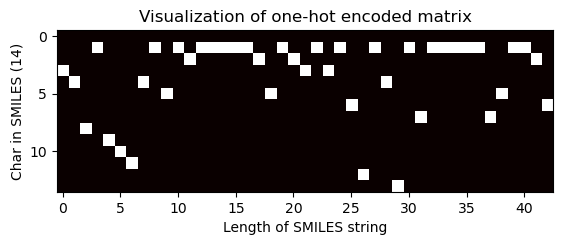

Shape of one-hot matrix :  (14, 43)
Associated canonical SMILES:  N([C@H](C)c1ccccc1)c1ncnc2oc(-c3ccccc3)cc12


In [36]:
# Choose index of the compound for which the OHE matrix is visualised
index = 100
one_hot_matrix_plot(
    df.iloc[index]["keras_ohe_matrix_without_padding"],
    df.iloc[index]["keras_ohe_matrix_without_padding"],
    df.iloc[index]["processed_canonical_smiles"],
)

#### With padding (equal dimension)

In [37]:
# Apply the function over the Processed_canonical_smiles strings
df["keras_ohe_matrix_padding"] = df["processed_canonical_smiles"].apply(
    keras_one_hot_encoded_matrix,
    smiles_maxlen=smiles_maxlen,
    unique_char=unique_char,
    islaterpadding=True,
)
df.head(2)

,chembl_id,canonical_smiles,Mol2D,processed_canonical_smiles,unique_char_ohe_matrix,sklearn_ohe_matrix_no_padding,sklearn_ohe_matrix_later_padding,sklearn_ohe_matrix_initial_padding,keras_ohe_matrix_without_padding,keras_ohe_matrix_padding
0,CHEMBL207869,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,Lc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,CHEMBL3940060,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,<rdkit.Chem.rdchem.Mol object at 0x000002407CA...,LCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(L)c(F)cc3)ncn...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


**Visualization of one-hot encoded matrix (unequal dimension)**

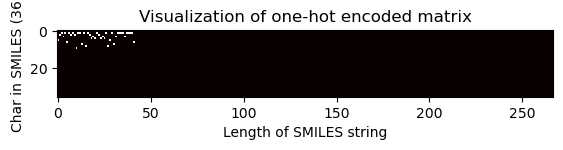

Shape of one-hot matrix :  (36, 267)
Associated canonical SMILES:  O(C)c1c(C(=Cc2c3c(N)nc(N)nc3oc2)CCCC)cccc1


In [38]:
# Choose index of the compound for which the OHE matrix is visualised
index = 2705
one_hot_matrix_plot(
    df.iloc[index]["keras_ohe_matrix_padding"],
    unique_char,
    df.iloc[index]["processed_canonical_smiles"],
)